In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv('obstpos.csv', delim_whitespace=True, header=2, skip_footer=14)
data.head()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: FutureWarning: The 'skip_footer' argument has been deprecated and will be removed in a future version. Please use the 'skipfooter' argument instead.
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


4788267     4788268      4788269  \
Lian/obstacleposition=0.2 numberofsteps      TL       28212        52972   
                          memory             TL       45525        69256   
                          pathlength         TL   518.39478    458.78925   
                          max_angle          TL  24.4866848  23.96249008   
                          dliantime          TL     0.65204     0.993071   

                                            4788270      4788271 4788272  \
Lian/obstacleposition=0.2 numberofsteps      208089       654437      TL   
                          memory             196064       596647      TL   
                          pathlength      481.21579    527.10358      TL   
                          max_angle      24.8515892  28.00917816      TL   
                          dliantime        8.217576    40.233852      TL   

                                        4788273     4788274      4788275  \
Lian/obstacleposition=0.2 numberofsteps      TL      980882       436853   
                          memory             TL      865859       493449   
                          pathlength         TL   493.26755    558.17157   
                          max_angle          TL  22.3801403  23.90205193   
                          dliantime          TL  126.574979     18.92034   

                                            4788276           1111  
Lian/obstacleposition=0.2 numberofsteps       21732  340453.857100  
                          memory              28083  327840.428600  
                          pathlength      450.44025     498.197539  
                          max_angle      24.4866848      24.582688  
                          dliantime        0.202014      27.970553

In [3]:
data = data.reset_index().fillna('0')
data = data[data['level_0'].str.contains('Lian')].drop(['1111'], axis=1)

In [4]:
obst2 = data[data.level_0.str.contains('0.2')].T
obst4 = data[data.level_0.str.contains('0.4')].T
obst6 = data[data.level_0.str.contains('0.6')].T
obst8 = data[data.level_0.str.contains('0.8')].T

In [5]:
obst2.head()

,0,1,2,3,4,5,26,27,28,29,...,2550,2551,2552,2553,2574,2575,2576,2577,2578,2579
level_0,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,...,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2,Lian/obstacleposition=0.2
level_1,numberofsteps,memory,pathlength,max_angle,dliantime,sumtime,numberofsteps,memory,pathlength,max_angle,...,pathlength,max_angle,dliantime,sumtime,numberofsteps,memory,pathlength,max_angle,dliantime,sumtime
4788267,TL,TL,TL,TL,TL,TL,693263,672043,486.46887,23.96249008,...,488.2356,24.8515892,0.171014,0.058003,99039,101075,481.24451,17.02051926,3.768267,2.84521
4788268,28212,45525,518.39478,24.4866848,0.65204,0.238013,237335,217326,547.21912,24.8515892,...,462.94397,24.8515892,11.230803,10.737761,TL,TL,TL,TL,TL,TL
4788269,52972,69256,458.78925,23.96249008,0.993071,0.491035,319491,317086,457.80569,24.4866848,...,TL,TL,TL,TL,433882,429666,507.1698,24.4866848,14.617031,9.074642


In [6]:
obsts = []
for obst in [obst2, obst4, obst6, obst8]:
    obst.columns = obst.iloc[1]
    obst = obst.reindex(obst.index.drop(['level_0', 'level_1']))
    obsts.append(obst)

In [7]:
obsts[0]

level_1,numberofsteps,memory,pathlength,max_angle,dliantime,sumtime,numberofsteps,memory,pathlength,max_angle,...,pathlength,max_angle,dliantime,sumtime,numberofsteps,memory,pathlength,max_angle,dliantime,sumtime
4788267,TL,TL,TL,TL,TL,TL,693263,672043,486.46887,23.96249008,...,488.2356,24.8515892,0.171014,0.058003,99039,101075,481.24451,17.02051926,3.768267,2.84521
4788268,28212,45525,518.39478,24.4866848,0.65204,0.238013,237335,217326,547.21912,24.8515892,...,462.94397,24.8515892,11.230803,10.737761,TL,TL,TL,TL,TL,TL
4788269,52972,69256,458.78925,23.96249008,0.993071,0.491035,319491,317086,457.80569,24.4866848,...,TL,TL,TL,TL,433882,429666,507.1698,24.4866848,14.617031,9.074642
4788270,208089,196064,481.21579,24.8515892,8.217576,5.369387,1057127,896443,555.19989,22.61986542,...,TL,TL,TL,TL,154852,212729,449.29355,16.69924736,3.670266,1.668118
4788271,654437,596647,527.10358,28.00917816,40.233852,34.612452,39699,53763,463.98056,22.3801403,...,497.57474,24.8515892,70.471995,40.10785,TL,TL,TL,TL,TL,TL
4788272,TL,TL,TL,TL,TL,TL,287603,265157,531.6156,29.67307854,...,505.13205,24.8515892,66.555723,44.378151,311520,293042,486.28128,24.14553261,11.84584,8.592595
4788273,TL,TL,TL,TL,TL,TL,TL,TL,TL,TL,...,488.24756,24.8515892,24.282719,16.623184,869696,777333,525.30261,23.96249008,84.662995,90.021383
4788274,980882,865859,493.26755,22.3801403,126.574979,69.573932,TL,TL,TL,TL,...,TL,TL,TL,TL,TL,TL,TL,TL,TL,TL
4788275,436853,493449,558.17157,23.90205193,18.92034,14.422035,TL,TL,TL,TL,...,468.49109,22.40983391,4.209305,3.275232,914481,979719,560.82379,24.8515892,38.958768,10.562754
4788276,21732,28083,450.44025,24.4866848,0.202014,0.120009,1908890,1446913,612.08716,47.92498016,...,508.25089,22.61986542,28.496022,7.515526,TL,TL,TL,TL,TL,TL


In [8]:
def index_marks(nrows, chunk_size):
    return range(1 * chunk_size, (nrows // chunk_size + 1) * chunk_size, chunk_size)

def split(dfm, chunk_size):
    indices = index_marks(dfm.shape[0], chunk_size)
    return np.split(dfm, indices, axis=1)

chunks = split(data, 6)

In [9]:
res_s = []

for da in obsts:
    res = split(da, 6)[0]
    df = split(da, 6)[1]
    while df.shape[1] >= 6:
        d = split(df, 6)
        res = res.append(d[0])
        df = d[1]
    res = res.dropna()
    res = res[~res.sumtime.str.match('TL')]
    res = res[~res.pathlength.str.match('PNF')].astype('float64')
    res = res[(res.sumtime > 0) & (res.dliantime > 0)]
    res_s.append(res)

In [10]:
res_s[0].head()

level_1,numberofsteps,memory,pathlength,max_angle,dliantime,sumtime
4788268,28212.0,45525.0,518.39478,24.486685,0.652040,0.238013
4788269,52972.0,69256.0,458.78925,23.962490,0.993071,0.491035
4788270,208089.0,196064.0,481.21579,24.851589,8.217576,5.369387
4788271,654437.0,596647.0,527.10358,28.009178,40.233852,34.612452
4788274,980882.0,865859.0,493.26755,22.380140,126.574979,69.573932


In [11]:
res_s[0]['dlian/2lian'] = res_s[0].dliantime / res_s[0].sumtime
res_s[0].head()

level_1,numberofsteps,memory,pathlength,max_angle,dliantime,sumtime,dlian/2lian
4788268,28212.0,45525.0,518.39478,24.486685,0.652040,0.238013,2.739514
4788269,52972.0,69256.0,458.78925,23.962490,0.993071,0.491035,2.022404
4788270,208089.0,196064.0,481.21579,24.851589,8.217576,5.369387,1.530450
4788271,654437.0,596647.0,527.10358,28.009178,40.233852,34.612452,1.162410
4788274,980882.0,865859.0,493.26755,22.380140,126.574979,69.573932,1.819287


In [12]:
d = res_s[0].drop(['dliantime', 'sumtime', 'max_angle', 'pathlength'], axis=1)

In [13]:
import matplotlib.pyplot as plt


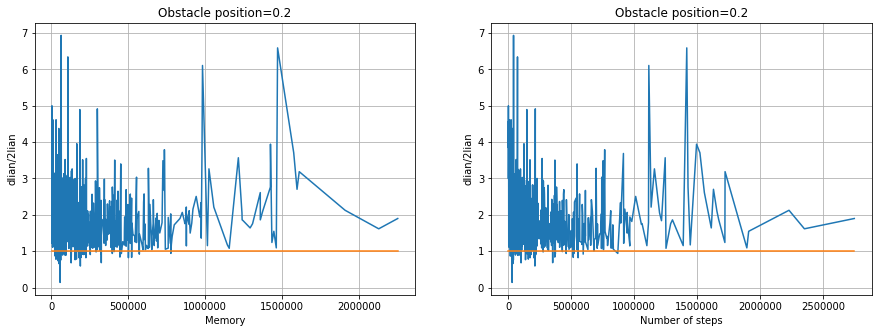

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(d.sort_values(by="memory").memory.tolist(), d.sort_values(by="memory")['dlian/2lian'])
plt.plot(d.sort_values(by="memory").memory.tolist(), np.ones(d.shape[0]))
plt.grid()
plt.title('Obstacle position=0.2')
plt.xlabel('Memory')
plt.ylabel('dlian/2lian')

plt.subplot(1, 2, 2)
plt.plot(d.sort_values(by="numberofsteps").numberofsteps.tolist(),
         d.sort_values(by="numberofsteps")['dlian/2lian'])
plt.plot(d.sort_values(by="numberofsteps").numberofsteps.tolist(), np.ones(d.shape[0]))
plt.grid()
plt.title('Obstacle position=0.2')
plt.xlabel('Number of steps')
plt.ylabel('dlian/2lian')

plt.show()

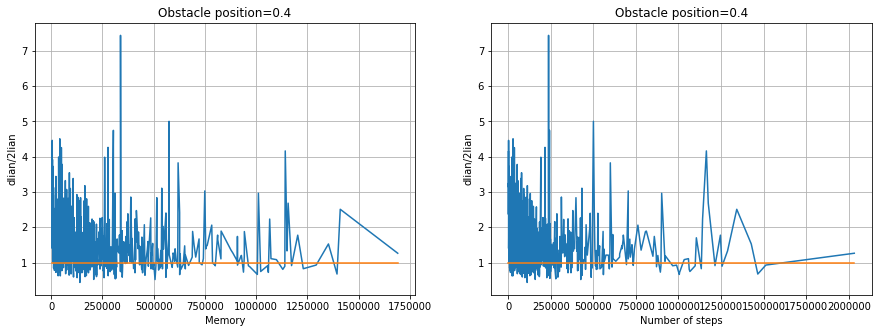

In [15]:
res_s[1]['dlian/2lian'] = res_s[1].dliantime / res_s[1].sumtime
d1 = res_s[1].drop(['dliantime', 'sumtime', 'max_angle', 'pathlength'], axis=1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(d1.sort_values(by="memory").memory.tolist(), d1.sort_values(by="memory")['dlian/2lian'])
plt.plot(d1.sort_values(by="memory").memory.tolist(), np.ones(d1.shape[0]))
plt.grid()
plt.title('Obstacle position=0.4')
plt.xlabel('Memory')
plt.ylabel('dlian/2lian')

plt.subplot(1, 2, 2)
plt.plot(d1.sort_values(by="numberofsteps").numberofsteps.tolist(),
         d1.sort_values(by="numberofsteps")['dlian/2lian'])
plt.plot(d1.sort_values(by="numberofsteps").numberofsteps.tolist(), np.ones(d1.shape[0]))
plt.grid()
plt.title('Obstacle position=0.4')
plt.xlabel('Number of steps')
plt.ylabel('dlian/2lian')

plt.show()

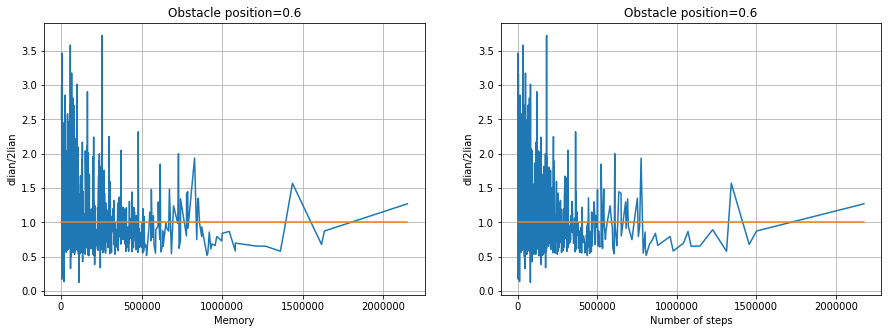

In [16]:
res_s[2]['dlian/2lian'] = res_s[2].dliantime / res_s[2].sumtime
d2 = res_s[2].drop(['dliantime', 'sumtime', 'max_angle', 'pathlength'], axis=1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(d2.sort_values(by="memory").memory.tolist(), d2.sort_values(by="memory")['dlian/2lian'])
plt.plot(d2.sort_values(by="memory").memory.tolist(), np.ones(d2.shape[0]))
plt.grid()
plt.title('Obstacle position=0.6')
plt.xlabel('Memory')
plt.ylabel('dlian/2lian')

plt.subplot(1, 2, 2)
plt.plot(d2.sort_values(by="numberofsteps").numberofsteps.tolist(),
         d2.sort_values(by="numberofsteps")['dlian/2lian'])
plt.plot(d2.sort_values(by="numberofsteps").numberofsteps.tolist(), np.ones(d2.shape[0]))
plt.grid()
plt.title('Obstacle position=0.6')
plt.xlabel('Number of steps')
plt.ylabel('dlian/2lian')

plt.show()

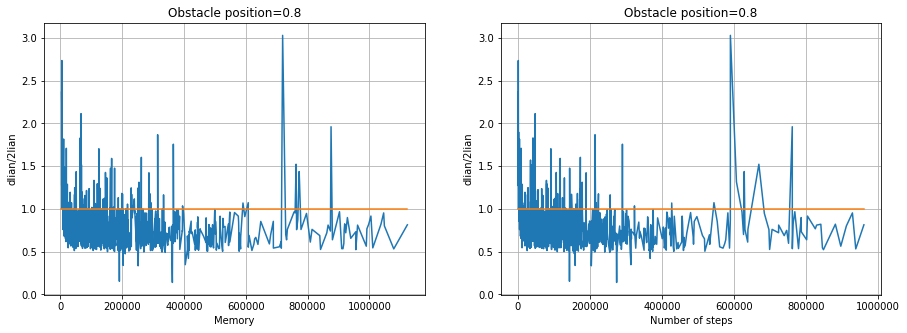

In [17]:
res_s[3]['dlian/2lian'] = res_s[3].dliantime / res_s[3].sumtime
d3 = res_s[3].drop(['dliantime', 'sumtime', 'max_angle', 'pathlength'], axis=1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(d3.sort_values(by="memory").memory.tolist()[:-10], d3.sort_values(by="memory")['dlian/2lian'][:-10])
plt.plot(d3.sort_values(by="memory").memory.tolist()[:-10], np.ones(d3.shape[0])[:-10])
plt.grid()
plt.title('Obstacle position=0.8')
plt.xlabel('Memory')
plt.ylabel('dlian/2lian')

plt.subplot(1, 2, 2)
plt.plot(d3.sort_values(by="numberofsteps").numberofsteps.tolist()[:-10],
         d3.sort_values(by="numberofsteps")['dlian/2lian'][:-10])
plt.plot(d3.sort_values(by="numberofsteps").numberofsteps.tolist()[:-10], np.ones(d3.shape[0])[:-10])
plt.grid()
plt.title('Obstacle position=0.8')
plt.xlabel('Number of steps')
plt.ylabel('dlian/2lian')

plt.show()

In [18]:
for i, res in enumerate(res_s):
    print('Dlian (obstpos='+str((i+1)*0.2)[:3] +') is better than Lian in:', np.mean((res['dlian/2lian'] <= 1)) * 100, '%')

Dlian (obstpos=0.2) is better than Lian in: 5.855161787365177 %
Dlian (obstpos=0.4) is better than Lian in: 27.164179104477608 %
Dlian (obstpos=0.6) is better than Lian in: 59.46704067321178 %
Dlian (obstpos=0.8) is better than Lian in: 84.31372549019608 %
